# Keras Regression Code Along Project 

This Project will be focus on feature engineering and cleaning our data with realistic data set!

## The Data

Source: Kaggle

https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('CA_housing.csv')

# Exploratory Data Analysis

In [34]:
# Let's look at data head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
#Check if data is missing
#df.isnull()
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


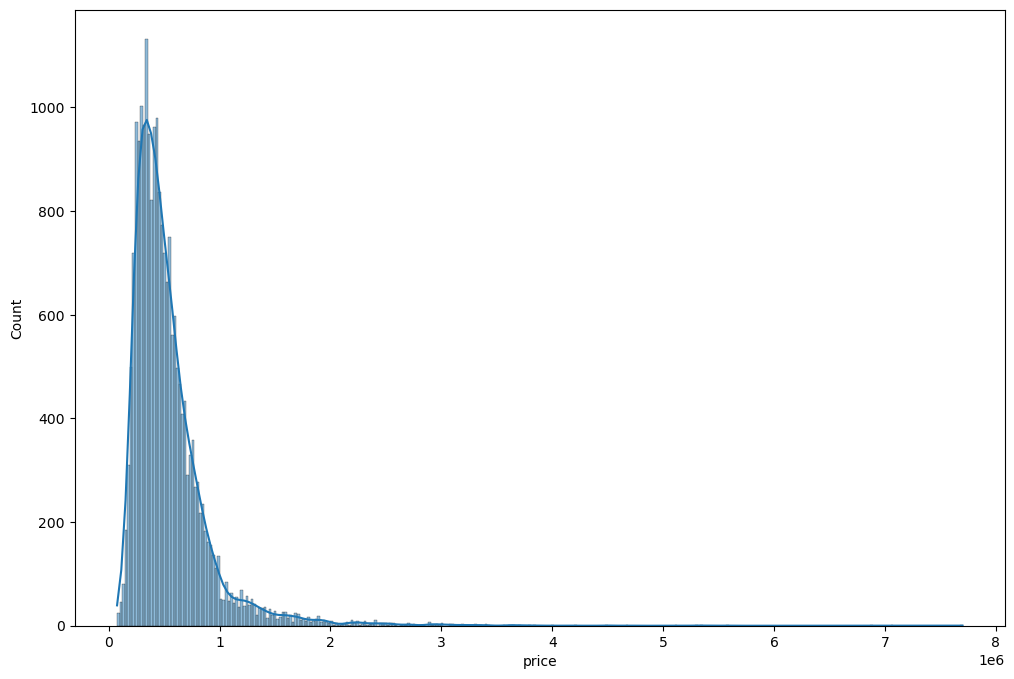

In [8]:
# Let's quick look at the price
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='price', kde=True)
plt.show()

We may consider removing the extreme outliers originating from expensive houses, as they might not contribute significantly to the model's training and could potentially distort the results.

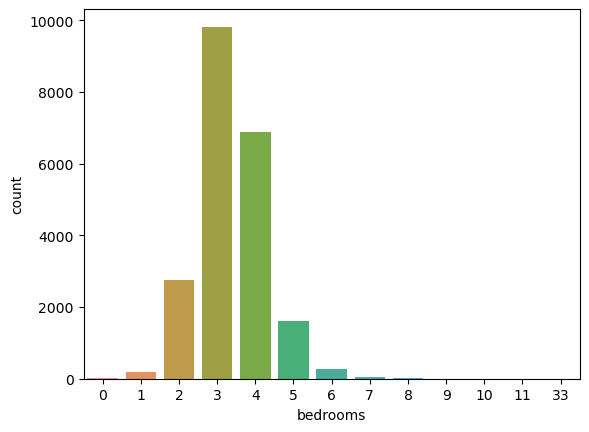

In [9]:
# Let's explore little more
sns.countplot(data=df, x='bedrooms')
#sns.countplot(data=df, x='bedrooms', order=sorted(df['bedrooms'].unique()))
plt.show()

In [10]:
#let's quick at look correlation
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [11]:
#let's look at how price is correlated with others
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

We can see the price highly correlatedwith sqft_living!

<Axes: xlabel='price', ylabel='sqft_living'>

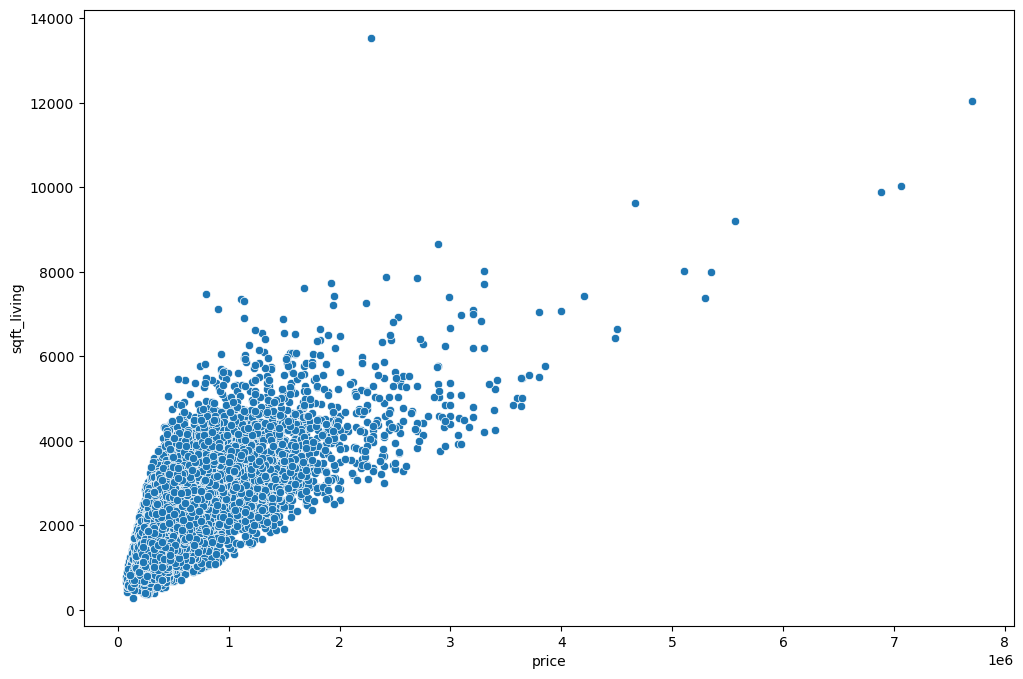

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

### Geographical Properties
Fun plots: There are some longitude and latitude information in the data. Let's explore a little bit!

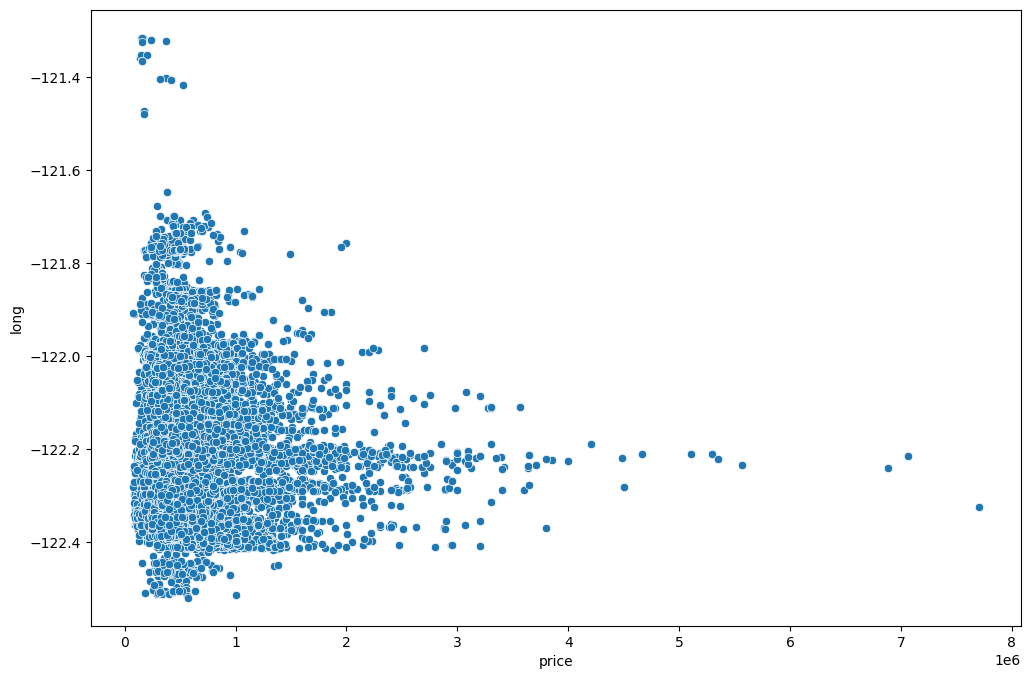

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)
plt.show()

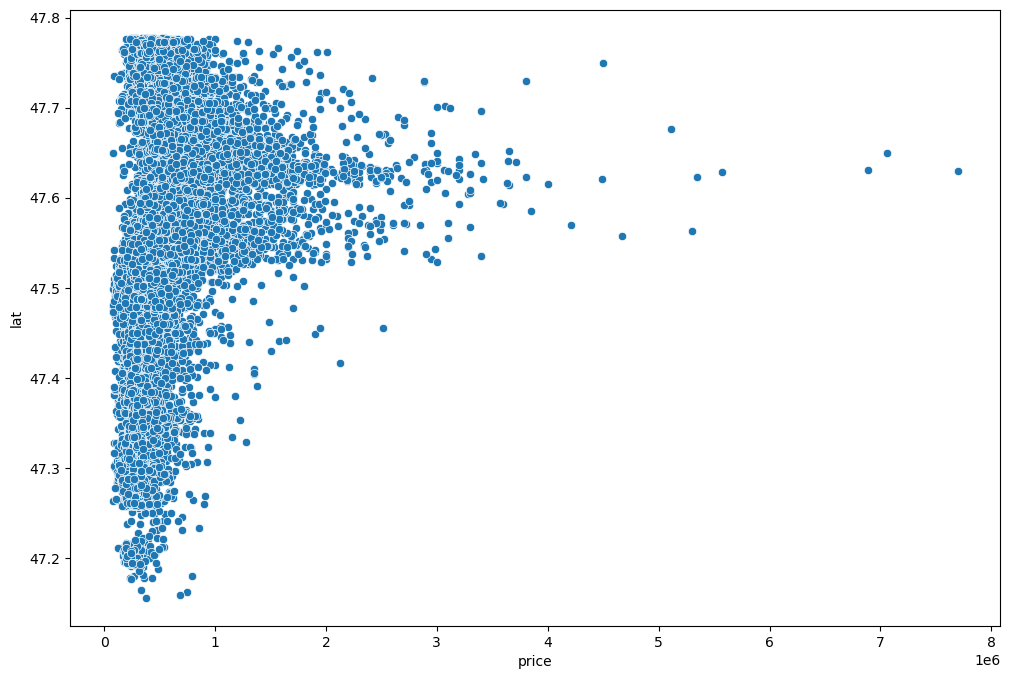

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)
plt.show()

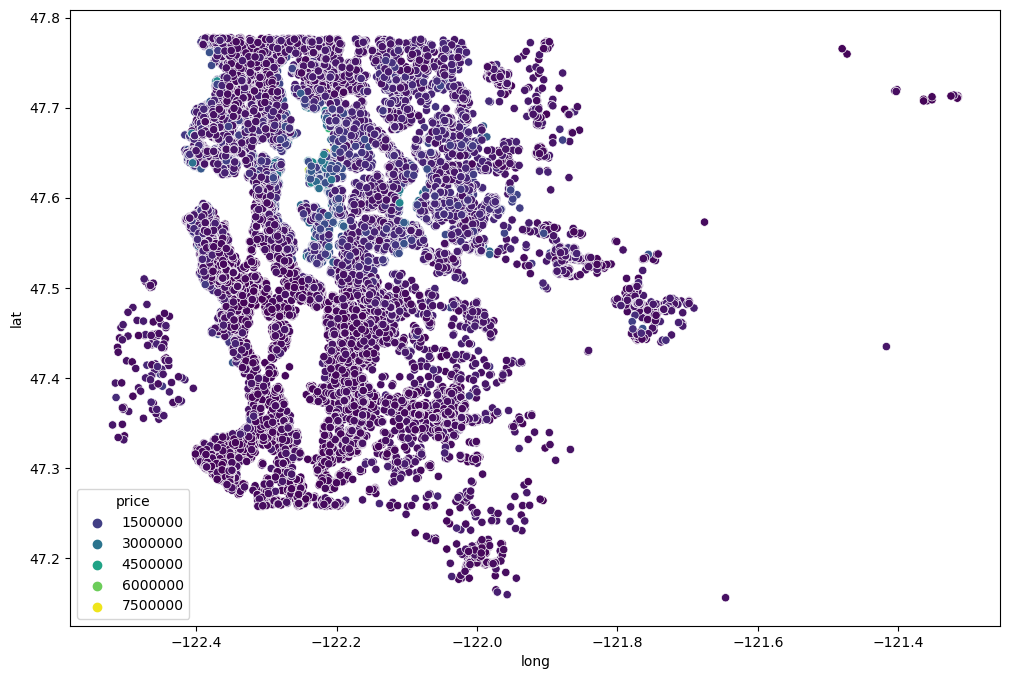

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis')
plt.show()


In [23]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [24]:
len(df)

21613

If we look as the count vs.price plot above there are only few houses that passed the 3M which is about a 1% of total houses based on the table above so lets remove these data for our analysis.

In [25]:
len(df)*(0.01)

216.13

In [27]:
bottom_99_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

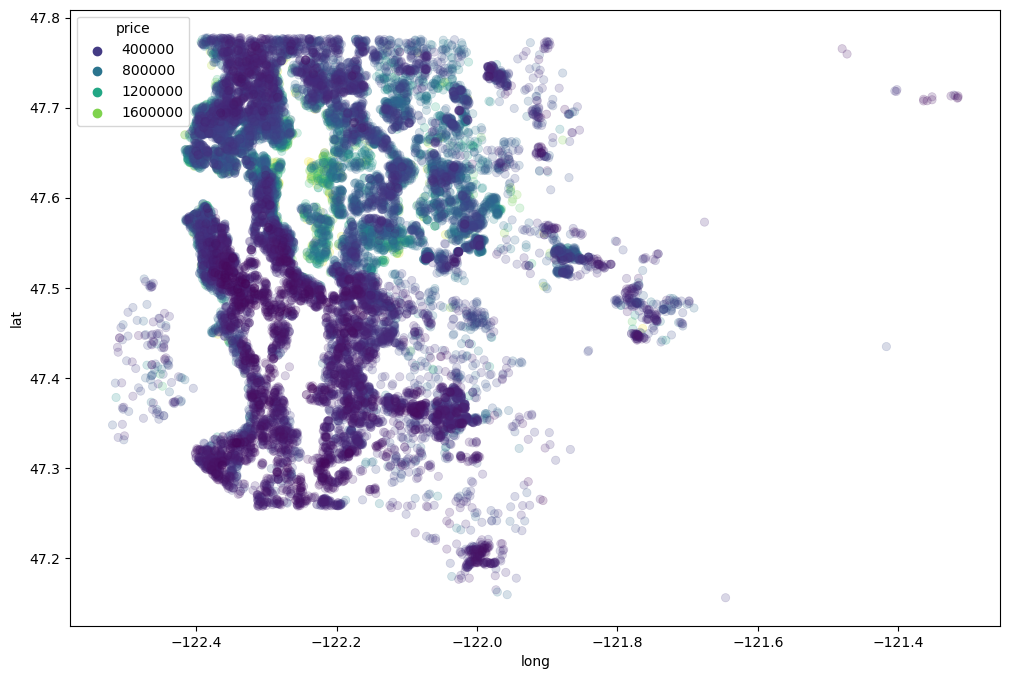

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=bottom_99_perc,hue='price',
                palette='viridis',edgecolor=None,alpha=0.2)

### Other Features

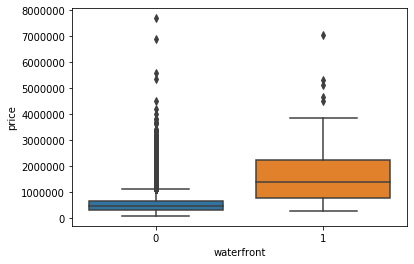

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [19]:
df = df.drop('id',axis=1)

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['month'] = df['date'].apply(lambda date:date.month)

In [23]:
df['year'] = df['date'].apply(lambda date:date.year)

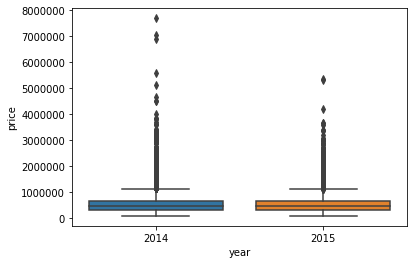

In [24]:
sns.boxplot(x='year',y='price',data=df)

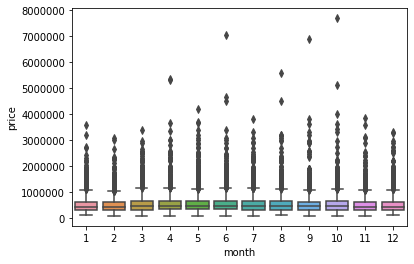

In [25]:
sns.boxplot(x='month',y='price',data=df)

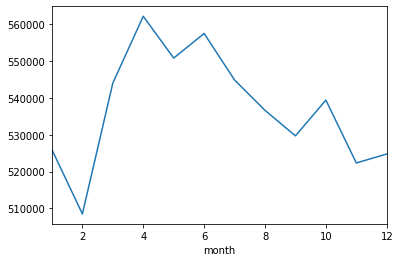

In [26]:
df.groupby('month').mean()['price'].plot()

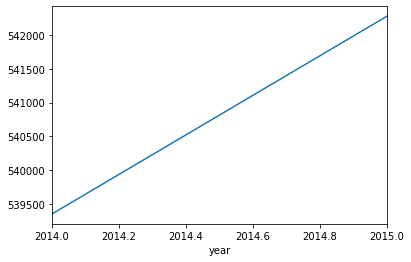

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
df = df.drop('date',axis=1)

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [30]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [31]:
df = df.drop('zipcode',axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [33]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [35]:
X = df.drop('price',axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train= scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(15117, 19)

In [43]:
X_test.shape

(6480, 19)

## Creating a Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [46]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 74us/sample - loss: 430228839929.3955 - val_loss: 418844493758.2617
Epoch 2/400
15117/15117 [==============================] - 0s 21us/sample - loss: 428253102583.9730 - val_loss: 411996069786.8642
Epoch 3/400
15117/15117 [==============================] - 0s 21us/sample - loss: 401401261499.3472 - val_loss: 351554389222.0839
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 281418027052.1653 - val_loss: 178278463958.2815
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 126127754575.5078 - val_loss: 95946680446.4198
Epoch 6/400
15117/15117 [==============================] - 0s 21us/sample - loss: 97670204498.9794 - val_loss: 93708013133.1160
Epoch 7/400
15117/15117 [==============================] - 0s 21us/sample - loss: 95694764310.6754 - val_loss: 91793937901.0370
Epoch 8/400
15117/15117 [=====================

15117/15117 [==============================] - 0s 21us/sample - loss: 32665666133.9938 - val_loss: 31180875164.1284
Epoch 128/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32611257821.4873 - val_loss: 31133322960.5926
Epoch 129/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32587610780.3061 - val_loss: 31109388368.9086
Epoch 130/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32532602761.3225 - val_loss: 31070066824.5333
Epoch 131/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32522762140.2215 - val_loss: 31049869848.0198
Epoch 132/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32456779739.7600 - val_loss: 30991022889.0864
Epoch 133/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32441568509.6800 - val_loss: 31072597773.2741
Epoch 134/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32410024930.5338 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 30409109880.6250 - val_loss: 28668203351.8617
Epoch 254/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30455913509.4593 - val_loss: 28813098750.1037
Epoch 255/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30437949613.1391 - val_loss: 28386738110.2617
Epoch 256/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30388506209.7040 - val_loss: 28367340799.3679
Epoch 257/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30382620658.2491 - val_loss: 28331952921.9160
Epoch 258/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30362880877.7530 - val_loss: 28368884743.5852
Epoch 259/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30377130940.6004 - val_loss: 28326146690.2123
Epoch 260/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30345498520.2249 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 29184432503.5073 - val_loss: 26707127121.5407
Epoch 380/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29192302663.5317 - val_loss: 26916886057.7185
Epoch 381/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29209242404.8666 - val_loss: 26659705383.1901
Epoch 382/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29177634422.7114 - val_loss: 26732598608.2765
Epoch 383/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29162964032.4191 - val_loss: 26640063419.7333
Epoch 384/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29135119725.1095 - val_loss: 26646387926.9136
Epoch 385/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29150060664.3032 - val_loss: 26652868825.4420
Epoch 386/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29143038606.3521 - v

In [47]:
losses = pd.DataFrame(model.history.history)

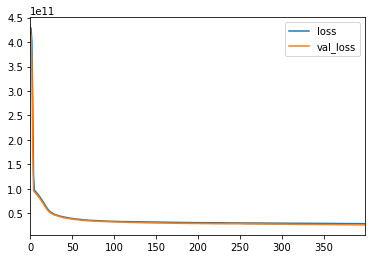

In [48]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [50]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_absolute_error(y_test,predictions)

101666.74811137635

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

162549.26352210157

In [54]:
explained_variance_score(y_test,predictions)

0.8009472831860807

In [55]:
df['price'].mean()

540296.5735055795

In [56]:
df['price'].median()

450000.0

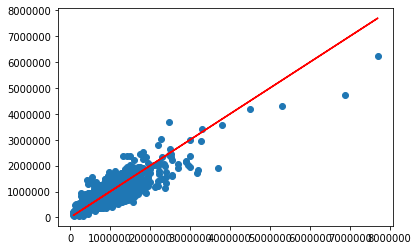

In [57]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

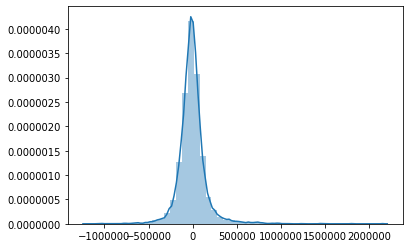

In [59]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [81]:
single_house = df.drop('price',axis=1).iloc[0]

In [86]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [87]:
single_house

array([[0.22222222, 0.08      , 0.11392405, 0.00433777, 0.        ,
        0.        , 0.        , 0.5       , 0.375     , 0.11654676,
        0.        , 0.47826087, 0.        , 0.56914119, 0.21760797,
        0.16510319, 0.00574235, 0.81818182, 0.        ]])

In [89]:
model.predict(single_house)

array([[283862.12]], dtype=float32)

In [90]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64